# <font color='#31708f'><center>Zendesk Tickets Word Cloud </center></font>

Set up the development environment: 
- Install Git
- Install Anaconda distribution
- Install Node.js
- Install Postman native app

<div class="alert alert-block alert-info">In Git Bash</div>

Set the working directory:

- Install Newman (command-line collection runner for Postman):

The following code block shows successful run of the command:

<div class="alert alert-block alert-info">In Base64</div>

AUTHORIZATION - Basic Authetication and API tokens<br> 
Use your company email address and Zendesk API key. The credentials must be sent in an Authorization header in the HTTP request. 

Authenticate a request with basic authentication and API token: 
- Combine your email address/token with your Zendesk API key with a colon:
```svetlana.staneva@eventsforce.com/token: {zendesk_api_key}```
- Base64-encode the resulting string:
```amRvZUBleGFtcGxlLmNvbTpwYSQkdzByZA==```

<div class="alert alert-block alert-info">In TextMechanic<div>

- Generate a lists of numbers (1-3000, 3001-5000, etc.) up to 59046
- Create a runner.csv files with a column ticket_id and listing numbers from 1 to 3000, etc.
- Move the files to the working directory JUPYTER_NOTEBOOKS

<div class="alert alert-block alert-info">In Postman 
<div>

Postman Comments Collection<br>
The Comments is a Postman collection that lists comments for Zendesk tickets from number 1 to 59046.

Create a new environment: 
- Click on the Cog icon 
- Click Add 
- In Add Environment enter a name for the environment - for instance, Test 
- Click Add

Select an active environment:
- Click the dropdown menu in the upper right corner of the Postman app to select an active environment (Test)

Request data via GET request: https://eventsforce.zendesk.com/api/v2/tickets/{ticket_id}/comments.json

In Headers include the base64-encoded string: 
- In Headers go to Presets > Manage Presets
- Add the Authorization and click Add: 
```Authorization: Basic {base64-encoded-string}```

In Tests add the following line of code:

Create Comments Collection
- Click on Collections > Create New Collection
- Enter a name - for instance, Comments and click Create

Save the Request in the Collection: 
- Click on Save As
- Select the Collection and click Save

Run the collection locally in the Postman Collection Runner with the runner_head.csv file.

Export the Comments collection: 
- Click on Collections 
- Hover over the Comments collection and click on the dots '...' that appear
- Click Export and again Export
- Save the file on the Desktop
- The exported file is COMMENTS.postman_collection.json
- Move the file COMMENTS.postman_collection.json to the working directory JUPYTER_NOTEBOOKS

<div class="alert alert-block alert-info">In Git Bash</div>

Run the Comments collection with the additional runner.csv file of key values (by 3000) and generate report in json.

In case it gives an error 'JavaScript heap out of memory' run the code in the following format:

or

or run the Comments collection with the additional runner.csv file of key values (by 1000) and generate report in json.

In order to run multiple runs with different runner.csv files, create a name.sh file listing the commands:

Run the .sh file:

Go to the newman folder:

In [2]:
cd newman

C:\Users\smsta\Desktop\GIT_REPOSITORIES\zendesk_tag_cloud\newman


Rename the newman .json file to file.json

RETHINK THE PART BELOW

In [10]:
import glob
filenames = glob.glob('C:/Users/smsta/Desktop/GIT_REPOSITORIES/zendesk_tag_cloud/newman/*.json') 
print(filenames)

['C:/Users/smsta/Desktop/GIT_REPOSITORIES/zendesk_tag_cloud/newman\\file1.json', 'C:/Users/smsta/Desktop/GIT_REPOSITORIES/zendesk_tag_cloud/newman\\file2.json']


In [16]:
for f in filenames:
    newman = open(f,'r', encoding="utf8")
    zendesk_tag_cloud = newman.readlines()
    data = json.load(newman)
    newman.close()
    for (k, v) in data.items():
        if k == "run":
            value_executions = v['executions']

NameError: name 'json' is not defined

RETHINK THE PART ABOVE

Parse JSON - convert from JSON to Python. When you open the file specify the encoding. After you open and read information from a file object, you should always close the file.

In [6]:
import json
f = open('file.json', encoding="utf8")
data = json.load(f)
f.close()

In [23]:
for (k, v) in data.items():
    if k == "run":
        value_executions = v['executions']

In [24]:
def extract_text_from_ticket(element):
    values= []
    for (k1, v1) in element.items():
        if k1 == "assertions":
            for elem in v1: 
                for (k2, v2) in elem.items():
                    if k2 == 'assertion':
                        res2 = json.loads(v2)
                        for (k3, v3) in res2.items():
                            if k3 == 'comments':
                                for elem1 in v3:
                                    for (k4, v4) in elem1.items():
                                        if k4 == 'body':
                                            values.append(v4)
    return(values)

In [29]:
ticket_list = []
for ticket in value_executions:
        output = extract_text_from_ticket(ticket)
        joined_output =' '.join(output)
        ticket_list.append(joined_output)

(Optional) if you would like to see the text of the tickets:

In [16]:
for (k, v) in data.items():
    if k == "run":
        value_executions = v['executions']
for element in value_executions: 
    for (k1, v1) in element.items():
        if k1 == "assertions":
            for elem in v1: 
                for (k2, v2) in elem.items():
                    if k2 == 'assertion':
                        res2 = json.loads(v2)
                        for (k3, v3) in res2.items():
                            if k3 == 'comments':
                                for elem1 in v3:
                                    for (k4, v4) in elem1.items():
                                        if k4 == 'body':
                                                print(v4)

This is the first comment. Feel free to delete this sample ticket.
This is a private comment (visible to agents only) that you added. You also changed the ticket priority to High. You can view a ticket's complete history by selecting the Events link in the ticket.
This is the latest comment for this ticket. You also changed the ticket status to Pending.
A Pivotal Tracker story has been created for this Ticket: http://www.pivotaltracker.com/story/show/43330107
Jeremy Ward added a comment in Pivotal Tracker:   
   
Adding a comment in Pivotal as an activity.   
   
View this Pivotal Tracker story: http://www.pivotaltracker.com/story/show/43330107
Adding comment in Zendesk @ 17:09
Jeremy Ward changed story state to started in Pivotal Tracker   
   
View this Pivotal Tracker story: http://www.pivotaltracker.com/story/show/43330107
Lynda Brown added a comment in Pivotal Tracker:   
   
The little dog jumped over the fence to see the big fat cat drinking the cream.   
   
View this Pivotal T

James
Hi Catherine

Just a follow up form my previous email. Would it be possible to chat tomorrow (Wednesday) regarding the Annual Conference?  I'm out of the office today but available tomorrow morning to see if we can make the basket and invoice for easy to read? 

Unfortunately the basket displays in alphabetical order so the possibly of renaming question prompts or hiding non-value items may focus delegates on what to pay for and display extra booked for items within emails.     

Hope to talk soon

Kind regards

James
Hi James,

Did you have a conversation with Catherine? Please review this ticket and then close it.

Thanks
Lynda
Call Catherine today. - Action for James
Hi James, 

Please can you update this with whatever you discussed with Cat? 

Many thanks,

Harry
Hi Cat

Apologies as this ticket raised months ago and we have missed each other trying to resolve. I've noted the event in question has finished however if you'd like to chat regarding improving the basket please do

a new system user has been created

who is 
Bill@capitalwealthadvisors.com
william Beynon
16 april 2013 created
unknown last login. 
(no role applied) 

Anna is the only person who should be creating users.
person ID
17645 

Date 	        Data Item 	         Event                       Old Value 	        New Value
28 Mar 2013 	CSV Import Date Time 		                10 Mar 2011 21:46 	28 Mar 2013 20:25
28 Mar 2013 	email 	                WealthStar Top         Bill@capitalWeal... 	bill@capitalweal...
28 Mar 2013 	Firstname 	WealthStar Top	                William 	                Bill
16 Apr 2013 	Firstname 	WealthStar Top                	Bill                     	William
4 Apr 2011 	Invitation Status 	2011 Aviva PPGA 	Invited 	                Declined
16 Apr 2013 	Invitation Status 	WealthStar Top      	Invited 	                Accepted
Hi Anna 

this user was uploaded by csv file on 28 March 2013 at 20:25 into event ID 2197. 

The user already existed before this upload. So the upload 

Thank you for confirming the event ID and that you were amending the bookings form the front end. I would like to try replicating what you were doing using the same bookings. Please can you confirm that the booking reference for the initial booking that you were editing was ISC110130X8P and that the second was ISC110133U1W, or do i have them the wrong way around? Also, whilst you were editing the bookings in the fronted, did you simultaneously have the backend of eventsforce open?
Ran Alert  NMI Reminder
Ran Alert  NMI Reminder
Ran Alert  Low
ftjjhtfyjtfyjtfyjtf
Routed by System using rule New Ticket
Your ticket has been created and you will be contacted as soon as there is an update.
image test:
Ran Alert  NMI Reminder
Customer emailed with the following

Hello there,
Wasn?t sure who was on ? call tonight, but if someone could get into event 147 and take a look at the optional pages called Hotel information and Contacts.  I?m having some trouble with the html editor and it?s creating 

Your ticket has been created and you will be contacted as soon as there is an update.
Routed by System using rule New Ticket
Hi Ali
 
I?ve just had a look at this and tested myself, but can?t replicate. What internet browser are you using and also what version is it? I need as much info, to try and replicate and see where the problem is.
 
Regards
Gavin
Hi Gavin,
It?s Internet Explorer - Version 8. I know it?s not happening to my colleagues but it keeps happening to me ? Any help in working out how to fix it would be much appreciated!!
Thanks
Ali
Ok, I?ve tried replicating this in IE8 and still don?t get the same result. I?ve asked a colleague and they say it might be an internal issue with your machine. Could you get your internal IT guys to have a look. Let us know.
 
Regards
Gavin
Customer called

After reaching the basket in frontend and clicking Proceed - she received an error message

This was do to invoicing not being set up.

Advised and resolved on call
resolved on call
Hi,
My

Added attachment: invoice1496.pdf
Had a look, the example looks like a miconfiguration issue to do with the line heights but there is no way of working out which template this is. Roger has already said that this is the case to Jenny, then Stacy has raised it, roger has said that this is the issue and Stacy has refuted this. it appears to really be the issue, and i will try to explain this by requesting an example with a template to refer back to so that I can show Stacy how to correct it.
Hi Stacy, thanks for the example invoice. i have had a look and can see a few elements that i believe are misconfigured in the template, however, it appears that the template in evid 1 has been changed since this invoice was printed, so I can see where the misconfiguration has happened. Please let me know if you have an example of an invoice that it behaving in this way where the template is still in use, I will then be able to find what is causing this issue.
Ran Alert  NMI Reminder
customer emailed

This issue is currently with our developers. We will update you as soon as there is further informatio
Ran Alert  Low
Your ticket has been looked at by our developers, you will be contacted as soon as there is further news
This issue has now been fixed. There is the following warning when uploading an abstract file:Warning: Any charcters in the filename that are not standard English alphanumerics (a-z, A-Z or 0-9), '_', '-' or '.' will be converted into an '_'.This will not affect the name of the file displayed on the screen, but will affect the name of the file when downloaded.
Hi Claire, I have heard back from our developers who have now fixerd this issue, which was being caused by non-standard characters in file names. A warning message will now be displayed when files are uploaded as follows:"Warning: Any charcters in the filename that are not  standard English alphanumerics (a-z, A-Z or 0-9), '_', '-' or '.' will  be converted into an '_'."Kind Regards,Harry
I  have informed Clair

Please could you look at the abstract submission process as the submit button at the bottom of the screen is not available (the one at the top works) - see screen grab
Routed by System using rule New Ticket
Your ticket has been created and you will be contacted as soon as there is an update.
"Please could you  look at the abstract submission process as the submit button at the  bottom of the screen is not available (the one at the top works) - see  screen grab " 

 
I have managed to replicate the issue  using a dummy address.I have upload a pdf doucment which doesn't have any special characters  and the submit button doesnt appear to be active  at the bottom but is active at the top of the screen . 

Test dummy details -   test@test2222321.com    Password - test
Changed Dev Priority from "" to 5 - frontend cannot complete bookings
Changed Dev Priority from 05 - frontend cannot complete bookings to 09 - major frontend cosmetic issue
Hi Gavin,
I could not find the event ID that they exp

As this was not happening in other browsers on my side, advised this could be a security setting on his IE and to get his internal IT guys to look and if still a problem to get back to us..
Good morning

I need to make a small textual amendment to a radio button field ? ?TravelBooked?

I need to change the text for one of the list alternatives from . . .

YES ? I will complete flight details now

To

YES ? I will complete details now

I am not able to do this as I assume there is a live booking using this prompt, but the change will have no impact on that booking and in order to better utilise this field, it would be useful for me to have this changed ? can you kindly as the dev team to amend this for me please.

This field applies to both the Delegate and Guest profiles

Thank you

Anton
Routed by System using rule New Ticket
Your ticket has been created and you will be contacted as soon as there is an update.
To do this I would advise you to do the following;
1. add a third alternati

Ticket logged in client file for later processing
There seems to be a bit issue when trying  to switch languages in Website pages&gt;	Abstract Submission - Required Pages&gt;	Review List Page
Routed by System using rule New Ticket
Your ticket has been created and you will be contacted as soon as there is an update.
Kerstin called to say she was having some issues viewing  	Review List Page when switching from french to german.  Firstly she would go french review list page and it would display correctly. However when she goes to german review list page she see a login page. But she logged out of EVF and back in and then selected the same German Review list page it displayed correctly.  I have been able to replicate this issue and for  a short term soultion  , I have advised her to log in and out.
There seems to be bit of issue switching between  languages in Review List page in Front Pages in German and French . firstly she would go french review list page 46259 and it  would display co

Hi Claire, Please see the screenshot attached to this response of the Reviewers screen as seen in my Chrome browser as discussed. Let me know if there any issues at all. Kind regards, Harry
Called Claire as i could not tell exactly what she wanted. It turned out that when she logged in she no longer had an issue., She reported that her issue had been when using Chrome as a browser which she no longer has access to, so I have checked in Chrome which also appears fine. I have sent a screenshot to Claire for her to confirm, but she seems happy now having seen that it is ok in IE.
Ran Alert  Low
Krista called wanted to send links for staff to test, advised to make site live
resolved on call
Catherine called wanting to know if she could swap attendee categories 
advised to create new - link with current and make the old one back end only
resolved on call
Justine has emailed with the following

I would like to use the friendly URL www.ucasevents.com/symposium, but appears one of your clients

Routed by System using rule New Ticket
Your ticket has been created and you will be contacted as soon as there is an update.
Informed Joyce that she had update the payment incorrectly. She needs to input -figure amount.
Ran Alert  Low
Reviewers cant see the indivdual papers which are assigned to them when logging in
Routed by System using rule New Ticket
Your ticket has been created and you will be contacted as soon as there is an update.
need to look at email sent ont he 8th march from Lynda to claire clarifying when papers can bew reviewed.
Ran Alert  Low
Ran Alert  Low
I have spoken to Lynda about this issue . Will call claire to clarify her understanding the way the system works.
Ran Alert  Low
Ran Alert  Low
Ran Alert  Low
Ran Alert  Low
Ran Alert  Low
Ran Alert  Low
Looks like yours Sam
Will closr for now .
needs to change a delegates email address.
Routed by System using rule New Ticket
Your ticket has been created and you will be contacted as soon as there is an update.
Hi Emil

Routed by System using rule New Ticket
Your ticket has been created and you will be contacted as soon as there is an update.
I have tried to replicate the issue but can't do this unless i go through a live transcation  on EMAP event . I have tried to contact Lisa however she is in meeting , will send an email.
Hi Lisa,  Just to update we are still investigating the issue with the Sumbit Button being greyed out.  I  may need to do a live test transcation in the event, would you be able to give permission. Regards, Samir Patel
Hi Sam, yes, that?s fine as long as it doesn?t affect anything in the front end.  Broadcast Digital Awards is another event where we ask for entry payment, and it doesn?t have this problem ? I think all the settings are the same. It?s event ID 140 if you want to compare.  Thanks Lisa  Lisa WalkerAwards Marketing ManagerEMAP Inform | Awards MarketingGreater London House | Hampstead Road | London | NW1 7EJ? 020 7728 5260  | ? 020 7728 5287 ? lisa.walker@emap.com
Lisa

Ran Alert  Low
Hi Valerie, As per the earlier message sent form my colleague James:"We would suggest the email address used on the backend user login is changed slightly to stop this happening in the future."Kind regards, Harry.
Ran Alert  Low
Hi James, Thanks for looking into this.? Can you advise how we?d prevent
this from happening again in future? Thanks.Valerie
Various problems and queries with reg pages, attendee cats and dependant questions.
Checked the dependant questions and made sure they were working.. Staff page was not setup properly like Partner. To save time we linked staff to partner and set certain reg prompts to partner att category only.Checked Attendee categories and registration and all seemed fine.
Kerstin called 

On her bookers page she has questions regarding Invoice address

Example booking ref: sbk05400474

Screenshot one 
Shows her account and it holds the invoice data from her registration

Screenshot two
shows what you see when you try and amend the bookin

Your ticket has been created and you will be contacted as soon as there is an update.
Hi JeremyI had a look at this and spoke to Roger and Steve to try get some help, but no one is sure how the module works. Apparently you are the man according to Steve who has been dealing with it and could help. I'll send her the guide in the meantime. ThanksGavin
Hi RosieI'm trying to find someone who can help with this module, but the people who can help are out of the office today. Attached is the SEO guide in the meantime, if you want to try and work through it.RegardsGAvin
cc'ing everyone so you can read my response: I don't know which event and so I cannot see if it is set up for SEO. If it is set up for SEO (i.e. there is a domain name entered in to the SEO settings page) then how it appears in Google is beyond the scope of the SEO module as all that module is doing is presenting the site via a single event domain to enable Google to search and find it. SEO in itself is a separate subject that

Ran Alert  Low
Ran Alert  Low
Ran Alert  Low
Ran Alert  Low
Ran Alert  Low
Ran Alert  Low
Discussed with account manager, who will test and process from here.
as discussed Roger, after you have tested and found this to work for yourself, please call the client to discuss the issue, with an view towards closing this ticket.
Ran Alert  Low
Ran Alert  Low
Spoke with Aimee and advised out of our control.
Jackie has emailed with the following

Above event has 5 categories of people to register.  To date we have canvassed for the ?Exhibitor? category.  Despite clearly defining each category some of our clients selected the incorrect category.  We are due to canvass for the next category ?Overseas Guests? next week.  In order to avoid clients selecting an incorrect category and causing confusion, I was thinking that I would make the other categories backend only and then making each category frontend at the appropriate time.

Can you please advise if this action might cause any issue with the

I have had a look at this and am not sure how John can do this. Please investigate further for him so we can inform him of the best solution.
Please show me how this can be done, if it can.
John called up again to chase. This is another event build and he is not trained on the system. I've had a loo, but am not sure on this one myself. I asked him if he had any trained users with a bit more experience he could go through and he didn't seem to think there'd be anyone.
Ran Alert  Low
Hi John  The event days can be set up ABI items &gt;Type ( Mutli Check boxes)&gt; Enter Price in Price description . Regards, Samir
Ran Alert  Low
Lisa has emailed with the following

Hello, 

Would it be possible to insert the attached tracking code into the registration of the property weeks hotels conference? The instructions and details of the code are in the attached files.

If you have any technical questions about the above then please contact Rebekah next week on rebekah.diedo@periscopix.com or 0207 

Hi Daniel & Andre, Thank  you for the information that you've sent along. I have been discussing  this with our developers this morning who are investigating the issue.  They would like to know a specific event where you last recall finding  the filed as you have described. Please let us know when you have a  moment. Kind regards, Harry.
Hi Shahadat, I have asked the client for which event they last believe they had the column available in stndard searching.  Please grab this ticket, as you will then be informed when they pass the information over. Thanks, harry.
Harry, I have a report for RISI
European Pulp and Paper Outlook Conference 2011 which contains the external account
reference but it now no longer appears in the tick list in the advanced tab in
events force.? It seems it has been removed from all events past, present and
future. Regards,Dan
Changed Dev Priority from "" to 10 - backend task not possible - no workaround
Hi Roger, this is the ticket I was discussing where the fi

Set Customer Email Notification to Off
Georgina is trained
Hi My main problem is that a customer requests their password.They get emailed this,They then immediately get directed to the registration details page, without ever having to input the passwrd that was sent to them.Having been directed to this registration page the detials that would have been filled in automatically by the system (if you were to have inputted a password) are blocked out.  These are the first name, surname etc.I would like to have this event invite sent out by the start of next week.  Pleas ecan soemone take a look?
Replicated, demonstrated to dev.
hi Georgina,  We have replicated this and been discussing it with our developers, they are looking at fixing this and we will get back to you with their progress as soon as there is any news. Kind Regards,Harry
Shahadat,As discussed, please look at this as soon as you can. thanks, harry.
Changed Dev Priority from "" to 07 - backend users cannot log in
For member's l

Changed Dev Priority from 08 - backend crashes to 11 - backend task not possible - workaround
Hi Rajib,This seems to be another ticket where the page needs to be refreshed when the clild window closes. Could you please have a look?Shahadat
selfDestruct needs to submit rather than redirect parent. Note that this happens only when you try add a new person immediately after adding a new list. If, after adding a new list, you go elsewhere and come back to the list details page, then you can add a person fine.
Ran Alert  Issue Identified Move
Ran Alert  Low
Ran Alert  Issue Identified Move
Ran Alert  Low
Ran Alert  Issue Identified Move
Ran Alert  Low
Ran Alert  Issue Identified Move
Ran Alert  Low
Ran Alert  Issue Identified Move
Ran Alert  Low
Ran Alert  Issue Identified Move
Ran Alert  Low
Ran Alert  Issue Identified Move
Ran Alert  Low
Ran Alert  Issue Identified Move
Ran Alert  Low
Ran Alert  Issue Identified Move
Ran Alert  Low
HI jim,Dev have released a fix for this. Harry.
Changed C

Hi Lisa  I  have today chased our testing team for an update in how this going with  their testing. We will let you know what they come back with. Regards,Samir.
is there ETA on the child ticket 3488
John, please test.ThanksLynda
Lisa called chasing this issueHad a look in the ticket and have advised her to test if it works in FireFoxShe has now mentioned this issue occurs when she tests it in IE8
I have tested this in IE 8 and i can not replicate the issueThe pdf uploads fine
Ran Alert  Low
Hi Lisa  I   have today chased our testing team for an update in how this going  with  their testing. We will let you know what they come back with. Regards,Samir
please update
Ran Alert  Low
Hi Lisa, This ticket is still with our testers, who have been chased for an  update. We will let you know what they come back with as soon as we have  it. Kind regards, Harry.
Ran Alert  Low
Hi Lisa, I have had a chat with our developers who are hoping to have this fix released after their final QA checks over

<div class="alert alert-block alert-info">In Anaconda Prompt (run as Admin)</div>

- Install wordcloud package:

In [26]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

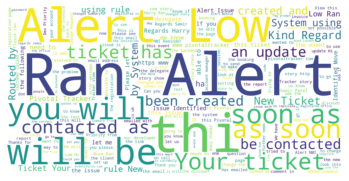

In [32]:
stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white",
                      width = 2000,
                      height = 1000,
                      max_words=200,  
                     ).generate(' '.join(ticket_list))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()